# Imported the dataset from Kaggle 

## Aim to predict - LUNG_CANCER

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Loading Dataset

In [2]:
data = pd.read_csv('survey lung cancer.csv')

In [3]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### Cheking For null values 

In [4]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

### Cheking for Dtype

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### Encoding LUNG_CANCER Column

In [6]:
data['LUNG_CANCER'].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [7]:
cancer = {"YES": 1,
              "NO": 0
               }

In [8]:
data['cancer'] = data['LUNG_CANCER'].replace(cancer)

In [9]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0


In [10]:
data.drop('LUNG_CANCER', inplace=True, axis=1)

In [11]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


### Checking for correlation

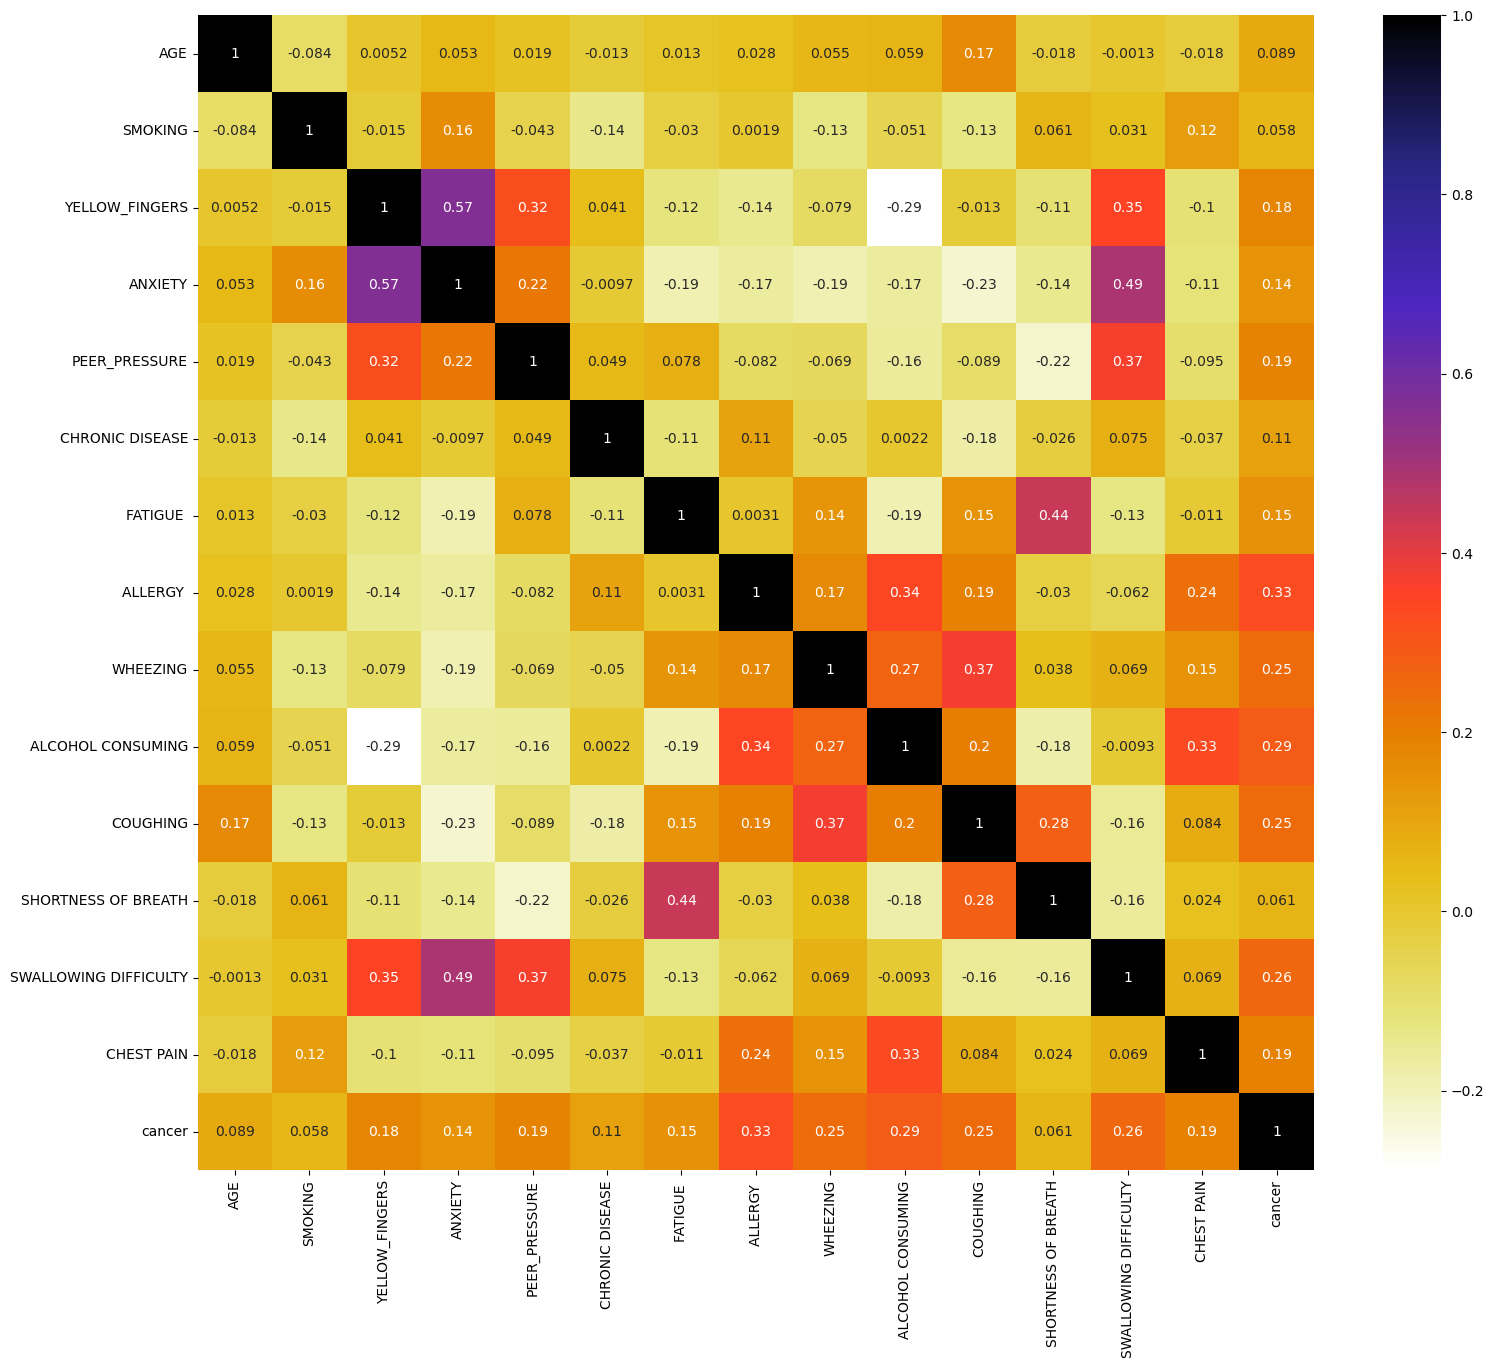

In [12]:
plt.figure(figsize=(18,15))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## Understanding data, one of the facinating thing is that, smooking impacts very less in Lung cancer

### Dropping non relevant columns

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  cancer                 

In [14]:
data.drop('GENDER', inplace=True, axis=1)
data.drop('AGE', inplace=True, axis=1)
data.drop('SMOKING', inplace=True, axis=1)
data.drop('ANXIETY', inplace=True, axis=1)
data.drop('CHEST PAIN', inplace=True, axis=1)
data.drop('SHORTNESS OF BREATH', inplace=True, axis=1)
data.drop('CHRONIC DISEASE', inplace=True, axis=1)

In [15]:
data.head()

,YELLOW_FINGERS,PEER_PRESSURE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,cancer
0,2,1,2,1,2,2,2,2,1
1,1,1,2,2,1,1,1,2,1
2,1,2,2,1,2,1,2,1,0
3,2,1,1,1,1,2,1,2,0
4,2,1,1,1,2,1,2,1,0


In [16]:
data.drop('YELLOW_FINGERS', inplace=True, axis=1)

### Setting target and feature for the model 

In [17]:
x = data.drop('cancer', axis = 1)   
y = data['cancer']   

### Checking For Outliners 

In [18]:
x.head()

,PEER_PRESSURE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY
0,1,2,1,2,2,2,2
1,1,2,2,1,1,1,2
2,2,2,1,2,1,2,1
3,1,1,1,1,2,1,2
4,1,1,1,2,1,2,1


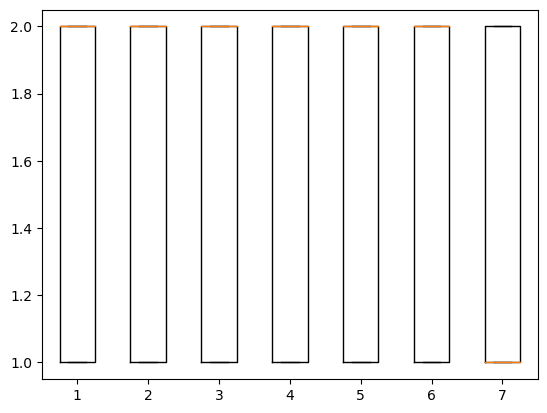

<Figure size 1200x1000 with 0 Axes>

In [19]:
plt.boxplot(x)
fig = plt.figure(figsize =(12, 10))
plt.show()

## Logistics Regression 

In [20]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=90)

In [21]:
clf = LogisticRegression(random_state=0).fit(train_x,train_y)

In [22]:
y_predict = clf.predict(test_x)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [23]:
y_predict.reshape(1, -1)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]],
      dtype=int64)

In [24]:
test_y.ndim

1

In [25]:
y_predict.ndim

1

In [26]:
clf.score(test_x,y_predict)

1.0

In [27]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_predict))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.98      0.95      0.96        57

    accuracy                           0.94        62
   macro avg       0.78      0.87      0.82        62
weighted avg       0.95      0.94      0.94        62



### Accuracy 94%

### Trying to find accuracy with Decision Tree model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [29]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=90)

In [30]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 10
                                    , max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=10)

In [31]:
y_pred_en = clf_entropy.predict(test_x)
y_pred_en

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [32]:
print(("Accuracy is "), accuracy_score(test_y, y_pred_en)*100)

Accuracy is  90.32258064516128


In [33]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred_en))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.89      0.94        57

    accuracy                           0.90        62
   macro avg       0.73      0.95      0.78        62
weighted avg       0.96      0.90      0.92        62



### Accuracy 90 %

### Conclusion 

### Now we can clearly conclude that for this particular data set logistic regression is working well, as it is giving better accuracy, main reason was that the data was clear, as no significant outliners.